In [1]:
from lbmpy.session import *
import pandas as pd
import matplotlib
from pystencils.runhelper.db import Database, remove_constant_columns
matplotlib.style.use('ggplot')

# Kida Vortex Flow evaluation

This notebook assumes that all scenarios have been run, for example by calling
`python3 kida_vortex_flow.py local`

This creates a `db` folder containing a database with all results. This notebook reads these results and analyses them.

The next cell reads the complete database into a pandas dataframe and does some basic clean up of the data.

In [2]:
db = Database('./db')
all_res = db.to_pandas({}) # load all


def clean_up(df):
    # Convert cells that are lists to tuples - so that the remove_columns works
    df = df.applymap(lambda e: tuple(e) if isinstance(e, list) else e)
    
    # fill defaults correctly
    df['compressible'] = df['compressible'].fillna(False)
    df['stencil'] = df['stencil'].fillna('D3Q27')
    df['entropic'] = df['entropic'].fillna(False)
    
    # add max_enstrophy column
    df['max_enstrophy'] = df.apply(lambda row: max(row['enstrophy']), axis=1)
    
    # sort of too high enstrophy (from unstable simulations)
    df['stable'] = df.apply(lambda row: row['stable'] and row['max_enstrophy'] < 4.0, axis=1)

    # Show only columns that are not constant
    df, constants = remove_constant_columns(df)
        
    return df
    
all_res = clean_up(all_res)

# get only the stable simulations
all_stable = all_res[all_res['stable']]

In [9]:
interesting_columns = ['domain_size', 'method', 'compressible', 'smagorinsky', 'entropic', 'stencil',
                       'relaxation_rates', 'max_enstrophy', 'mlups']

In [10]:
all_stable[interesting_columns]

,domain_size,method,compressible,smagorinsky,entropic,stencil,relaxation_rates,max_enstrophy,mlups
pk,,,,,,,,,
ececd102bb704556ba259a90cf08d6ef,100,mrt3,False,NaN,False,D3Q19,"(None, 1, 1)",1.231109,176.596129
12a60c0f482041468d426f060d591ea0,100,mrt3,False,NaN,False,D3Q27,"(None, 1, 1)",1.163564,91.106972
e5030ef8146943bd9548e40a1ac0deba,100,srt,True,0.80,False,D3Q19,NaN,0.494621,217.031768
4083027c83e144a3a916d7f205268ff8,100,srt,False,0.80,False,D3Q19,NaN,0.493650,239.673111
a07245bd0f9740a7bb1d2a5401643a67,100,srt,True,0.80,False,D3Q27,NaN,0.494792,141.128573
04df0909d67443f98cef2fa12ea15358,100,srt,False,0.80,False,D3Q27,NaN,0.493823,152.456265
5f19fe8bf62947b09b002888a9288a2b,100,srt,True,0.10,False,D3Q19,NaN,1.438728,207.926447
d3d08944480e49ffa2e50a6f7c8fab83,100,srt,False,0.10,False,D3Q19,NaN,1.434357,237.441128
ad585c4f6bed4d60bbdb0ee9bfde51bb,100,srt,True,0.10,False,D3Q27,NaN,1.459617,143.931989


The next cells shows the simulations with the maximum enstrophy:

In [12]:
all_stable.sort_values('max_enstrophy', ascending=False).query("domain_size==50").head(10)[interesting_columns]

,domain_size,method,compressible,smagorinsky,entropic,stencil,relaxation_rates,max_enstrophy,mlups
pk,,,,,,,,,
88563608773741bdb3b0fa324fa8efcf,50,srt,True,0.1,False,D3Q19,NaN,0.826669,80.106425
d1be6b688fae439684bba3944dbd0a88,50,srt,False,0.1,False,D3Q19,NaN,0.825455,83.918875
054dd85fe3214bcd99433be4781de499,50,trt-kbc-n4,True,NaN,True,D3Q27,NaN,0.823226,34.204170
e22d730605f945428515b45158f7db5b,50,srt,True,0.1,False,D3Q27,NaN,0.819374,64.945927
b69c4cbaf91c4d61bf1c4b93ebcfc7eb,50,srt,False,0.1,False,D3Q27,NaN,0.817902,67.821583
8bf5ddecca204b46b850e8b637948a5b,50,trt-kbc-n2,True,NaN,True,D3Q27,NaN,0.814222,35.735995
3642e846bd3948d68497d94bf744b04b,50,mrt3,True,NaN,True,D3Q19,"(viscosity, free, free)",0.803124,48.392167
bf5974695ac84c4096628d96bf02ff7e,50,trt-kbc-n3,True,NaN,True,D3Q27,NaN,0.779788,31.725340
beacfae2f81a403f83137e0914b9360d,50,trt-kbc-n1,True,NaN,True,D3Q27,NaN,0.779498,32.201492


## Plotting

rows can be accessed by their key:

In [6]:
def plot_scenarios(rows):
    if not hasattr(rows, '__len__'):
        rows = [rows]
            
    lines = []
    
    fig, axes = plt.subplots(1, 3, figsize=(16, 8))
    for row in rows:
        l, = axes[0].plot(row['time'], row['enstrophy'])
        lines.append(l)
        axes[0].set_title("Enstrophy")
        axes[0].set_xlabel("time")

        axes[1].plot(row['time'], row['kinetic_energy'])
        axes[1].set_title("Kinetic energy")
        axes[1].set_xlabel("time");

        axes[2].loglog(row['energy_spectrum'])
        axes[2].set_title("Energy Spectrum");

    descriptions = [
        "{size} {c} {method}{ent}{rr}{smag}".format(
            c="comp" if row.compressible else "incomp",
            size=row.domain_size,
            smag="Smagorinsky({})".format(row.smagorinsky) if not pd.isnull(row.smagorinsky)else "",
            rr=row.relaxation_rates if not pd.isnull(row.relaxation_rates) else "",
            method=row.method,
            ent="entropic " if row.entropic else "")
        for row in rows]
        
    plt.figlegend(lines, descriptions, loc = 'lower center')

domain_size                  100
method                      mrt3
smagorinsky                  NaN
entropic                   False
stencil                    D3Q27
relaxation_rates    (None, 1, 1)
max_enstrophy            1.16356
mlups                     91.107
Name: 12a60c0f482041468d426f060d591ea0, dtype: object


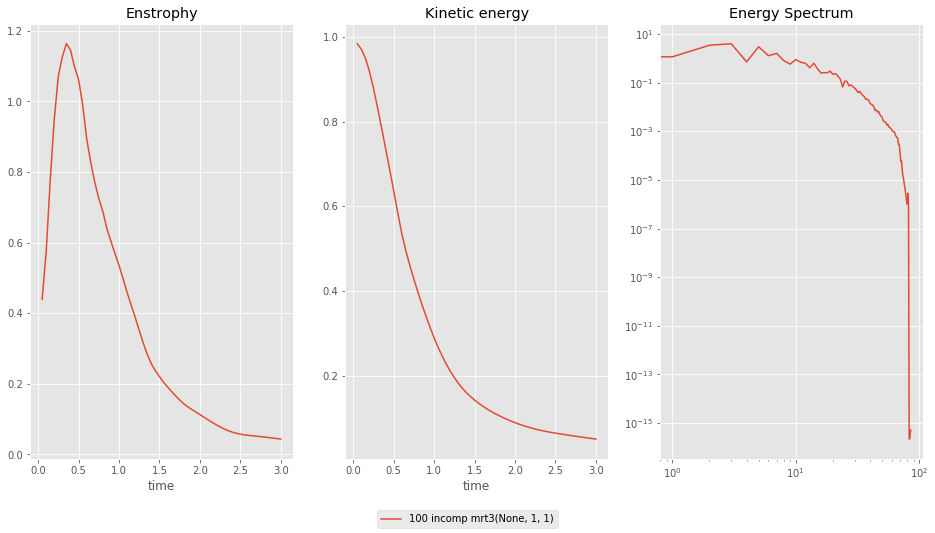

In [7]:
#row = all_stable.loc['d18644c1a06242d9a983387c12a8a366']
row = all_stable.iloc[1]
plot_scenarios([row])
print(row[interesting_columns])

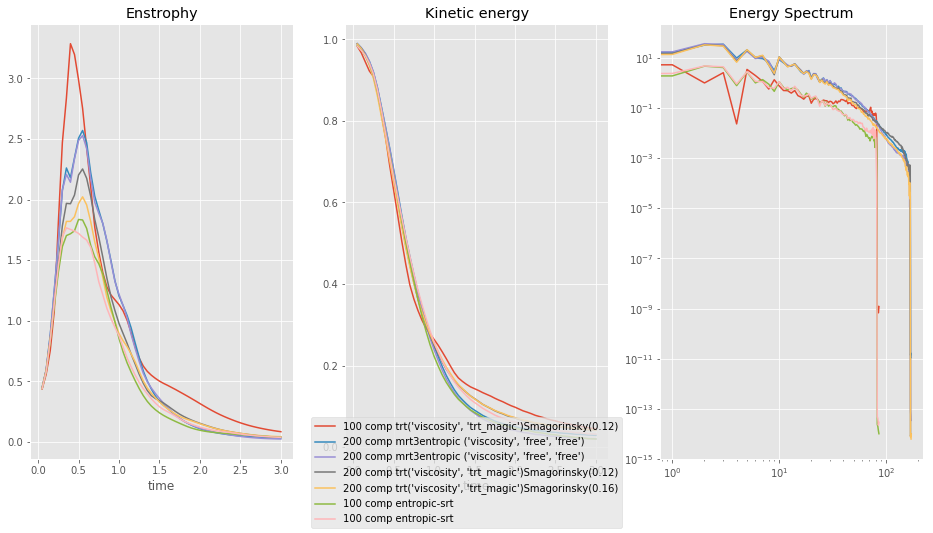

In [8]:
# or multiple rows
best = all_stable.query("compressible==True").sort_values('max_enstrophy', ascending=False).head(7)
plot_scenarios([r[1] for r in best.iterrows()])

In [9]:
r = [r[1] for r in best.iterrows()][-1]
np.isfinite(r.relaxation_rates)

False

## Filtering

Example: get all simulations with Smagorinsky model and D3Q19 stencil

In [10]:
smag_d3q19 = all_res.query("(smagorinsky > 0) and (stencil =='D3Q19')")
smag_d3q19[interesting_columns]

,domain_size,method,smagorinsky,entropic,stencil,relaxation_rates,max_enstrophy,mlups
pk,,,,,,,,
e5030ef8146943bd9548e40a1ac0deba,100,srt,0.80,False,D3Q19,NaN,4.946206e-01,217.031768
4083027c83e144a3a916d7f205268ff8,100,srt,0.80,False,D3Q19,NaN,4.936496e-01,239.673111
5f19fe8bf62947b09b002888a9288a2b,100,srt,0.10,False,D3Q19,NaN,1.438728e+00,207.926447
d3d08944480e49ffa2e50a6f7c8fab83,100,srt,0.10,False,D3Q19,NaN,1.434357e+00,237.441128
b8640f253f804e07b23b4bd76d9db1b9,100,trt,0.12,False,D3Q19,"(viscosity, trt_magic)",3.286732e+00,200.702268
d18644c1a06242d9a983387c12a8a366,100,trt,0.12,False,D3Q19,"(viscosity, trt_magic)",3.377183e+00,214.121774
f8e9b66b166041eaa54ba33b91ea1154,100,trt,0.16,False,D3Q19,"(viscosity, trt_magic)",1.643292e+00,196.540572
17b9c19fa8ab4e15b065be47a272791f,100,trt,0.16,False,D3Q19,"(viscosity, trt_magic)",1.645383e+00,211.561366
ca9a8ab2b76048da89a96b6d585d4eaf,100,trt,2.00,False,D3Q19,"(viscosity, trt_magic)",2.994949e-01,195.848303
